# What Sentiment Analysis Can Reveal About Common Speech Patterns

## Digital Humanities 140 Coding for Humanities with Professor Winjum at UCLA Winter 2022

#### 3/14/2022 | Crystal Huynh, Larry Qu, Nelson Truong

### Introduction
(an overview of your entire project, your research topic and question, your motivation to study this topic, and any prior related work) (will delete these directions later)

#### Project Overview
This project analyzes the sentiment of a data set of movie reviews using Python in order to  

#### Research Question: What common speech patterns can be found in positive and negative commentary?
Our group wanted to explore how people tend to speak when talking in an extremely positive and negative manner, especially in the context of movie reviews. Are there specific words that are frequently used when speaking in a positive sentiment versus a negative one? How often do those words show up in speech? How polarizing are these frequently used words? Do people tend to speak more when they are feeling positive or negative about something? This is the first step that we want to take when analyzing the speech patterns of movie reviews.

#### Why It Matters
With this information, we can later see whether these patterns match typical human behavior/speech, or if they are more specific in an online, more anonymous environment. We can use our findings to potentially see how polarizing these spaces are and how they affect our society in the long run as this type of analysis can also be used on things like social media comments and news articles where commentary can be even more polarizing. As we explore speech patterns in settings outside of normal, in person conversation, we can get a better idea of how people truly think and feel in certain environments or how people will think and feel given what we already know. 

### Methods
(explain your data and your analytical process)

#### Data Source - add more
[IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

[More Dataset Information](http://ai.stanford.edu/~amaas/data/sentiment/)

We are using the IMDB Dataset of 50K Movie Reviews Large Movie Review Dataset from kaggle which contains 50K movie reviews. This dataset can be used for binary sentiment classification as it contains highly polar movie reviews for training and testing.

https://gist.github.com/mkulakowski2/4289441

https://gist.github.com/mkulakowski2/4289437

In order to indentify the positive and negative words, we can easily scan the web for premade datasets. These two shown above are datasets containing negative and positive words, respectively, that we can use to analyze our movie reviews with.

#### Project Scope
The intended analysis is to see what are the common "positive" and "negative" words being used and how often they are used. The resulting visualizations for this would probably be something like a bar chart highlighting the ten most common "positive" and "negative" words and how often they appear in the dataset. We can also how long "positive" reviews are compared to "negative" reviews by checking the word count for each review and plotting the total word count frequency in a separate bar chart. Another analysis we could do is categorize common "positive" and "negative" words to see how polarizing they really are and plot this on another bar chart to visualize the scale of how positive "positive" reviews are and how negative "negative" reviews are.

#### Analytical Process
fluff

#### Expected Insights
We expect to see more polarizing "positive" and "negative" reviews to be lengthier in word count as people tend to speak more than they are feeling extremely "positive" or "negative" which is typical in normal, everyday, real life behavior. However, many people tend to not show their true thoughts and feelings when speaking in public, so perhaps in spaces like movie reviews, people's wording may be more polarizing than if they were to be giving the review in person. In other words, their online, anonymous reviews may be a lot more emotional and biased than what people would typically say aloud. We might see that although online commentary may reflect human behavior in that it represents what people actually are thinking and feeling, it may not be representative of what people would normally say to others. However, organizations can use these findings to gauge a more truthful reaction from the public for their respective initiatives and campaigns to see what they need to improve upon in order to generate a positive response.

### Results 
(lay out your data exploration, your findings, and your visuals)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis vitae augue justo. In vitae ligula eleifend, accumsan sapien ut, cursus odio. Nunc id tincidunt turpis. Nulla faucibus massa ut ipsum ultricies pulvinar at sodales turpis. Nunc vitae porttitor orci. Praesent a mauris vel felis accumsan euismod ultrices nec risus. Vivamus ligula sapien, blandit in nunc eu, tincidunt posuere quam. Aenean quis venenatis lorem, non tempor purus. Sed sapien velit, scelerisque quis accumsan non, volutpat id odio. In sollicitudin diam a felis volutpat varius. Quisque fermentum augue nisi, sit amet porttitor augue mollis id. Phasellus dictum magna ac tellus molestie, ac dictum dui dapibus.

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import vader
nltk.download('vader_lexicon')
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Data Exploration

fluff

In [2]:
#turn the csv file into a dataframe
imdb_df = pd.read_csv('IMDB Dataset.csv')
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# summary information about the dataframe
imdb_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
# how many reviews are labeled positive vs. negative
imdb_df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

##### fluff filler about word freq

In [5]:
#most common words used for positive and negative sentiments
#positiveReviews = []
#negativeReviews = []
positiveText = ""
negativeText = ""


for i in range(len(imdb_df['review'])):
    if imdb_df['sentiment'][i] == "positive":
        #positiveReviews.append(imdb_df['review'][i])
        positiveText += imdb_df['review'][i]
    else:
        #negativeReviews.append(imdb_df['review'][i])
        negativeText += imdb_df['review'][i]

#print(positiveReviews[:5])

#tokenize the words
sent = sent_tokenize(positiveText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in positive reviews")

freq = FreqDist(wordsNoStop)
for j in sorted(freq, key=freq.get, reverse=True)[:30]:
    print(j,freq[j])
    
positiveFreq = freq

#tokenize the words
sent = sent_tokenize(negativeText)
words = []
for s in sent:
    for w in word_tokenize(s):
        words.append(w)
        
#remove stopwords
myStopWords = list(punctuation) + stopwords.words('english')
wordsNoStop = []
for i in words:
    if i.lower() not in myStopWords:
        wordsNoStop.append(i)
        
print("30 most common words in negative reviews")

negfreq = FreqDist(wordsNoStop)
for j in sorted(negfreq, key=negfreq.get, reverse=True)[:30]:
    print(j,negfreq[j])
  
#onlyPositive = []
#for pword in freq:
#    if pword not in negfreq:
#        onlyPositive.append((pword, freq[pword]))
        
#onlyNegative = []
#for negword in negfreq:
#    if negword not in freq:
#        onlyNegative.append((negword, freq[negword]))
        
#onlyPositive.sort(key = lambda x: -1*x[1]) 
#onlyNegative.sort(key = lambda x: -1*x[1]) 

    
#print("30 most common words in positive reviews")
#print(onlyPositive[:30])

#print("30 most common words in negative reviews")
#print(onlyNegative[:30])

30 most common words in positive reviews
br 97952
's 63002
film 39754
movie 35757
'' 31962
`` 31591
n't 26471
one 23831
like 16414
good 13759
story 12042
great 11790
time 11453
see 11437
would 11098
really 10443
well 9931
also 9373
much 8747
even 8331
first 8278
people 8154
get 8023
... 7898
love 7747
best 7536
way 7413
films 7230
many 7084
could 7056
30 most common words in negative reviews
br 103996
's 58724
movie 47078
n't 39383
film 35412
`` 34654
'' 33910
one 22847
like 21231
would 15021
good 13687
even 13368
bad 13313
really 11809
... 11704
could 11131
time 11022
see 10328
get 9784
much 9628
story 9462
make 8892
people 8887
made 8303
movies 7704
plot 7666
acting 7634
way 7231
characters 7072
first 7045


what do these words tell us?

##### Reword 
The following cells will be exploring a small subset of the dataset (first 1000 reviews, first 5000 reviews, etc) to try to gain an idea of what kind of dataset we are working with. Expanding upon the previous section where we looked at the 30 most frequent words in positive and negative reviews, we tried to create data visualizations to better represent these differences. Throughout our data exploration, we used a lot of tokenization and lemmatization to try to get the frequency of different words used in the movie reviews. This ended up in a lot of weird "words" such as br or '' which we all know aren't actually words. So, we tried to clean those words up where we could see them and then created the different bar charts of word frequency.

In [6]:
# Compile first 1000 reviews into one giant string
reviews = ""
for ind in range(1000):
    reviews = reviews + " " + imdb_df["review"][ind]
    
# Create a list of stop words
stop_words = stopwords.words("english") + list(punctuation)

# Tokenize and convert all the reviews to lowercase
words = word_tokenize(reviews.lower())

# Remove all unwanted words
completewords = [w for w in words if w not in stop_words]

# Lemmatize the list of words
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]

# Find the frequency of all words
freq = FreqDist(completestemmed)

# Turn this list into a pandas dataframe
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
    
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,4124
1,'s,2349
2,movie,2056
3,film,1770
4,``,1285
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


filler text

In [7]:
# Purge weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df

,wordlist,wordfreq
2,movie,2056
3,film,1770
7,one,1012
8,like,785
9,get,552
...,...,...
18499,intuition,1
18500,stubborn,1
18501,minds.,1
18502,'swearing,1


fluff words

In [11]:
# Mean
df['wordfreq'].mean()

6.501919022649873

In [12]:
# Median
df['wordfreq'].median()

1.0

In [13]:
# Mode
df['wordfreq'].mode()

0    1
dtype: int64

what do these values tell us?

fluff about graphs

<AxesSubplot:ylabel='Frequency'>

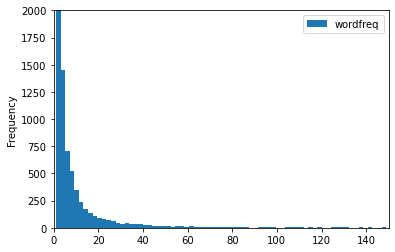

In [17]:
# Histogram
df.plot.hist(bins=1000, xlim=(0, 150), ylim=(0,2000))

analysis fluff

<AxesSubplot:ylabel='wordlist'>

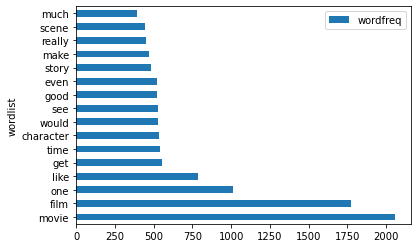

In [18]:
# Barchart of the 17 most frequent words
bar_df = df.loc[0:20, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")
#ax = bar_df.plot.bar(x='wordlist', y='wordfreq', rot=0)

analysis fluff

<AxesSubplot:ylabel='wordlist'>

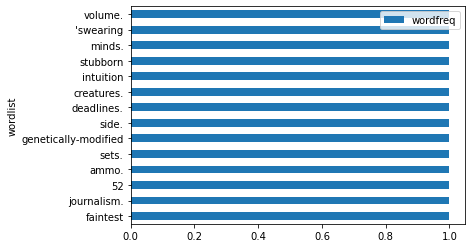

In [20]:
# Barchart of the 19 least frequent words
bar_df = df.loc[18490:, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq")

# need to find all words with only a freq of 1

analysis fluff

##### Positive Reviews
fluff about next section on positive reviews

In [23]:
# Look only at the first 1000 positive reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "positive":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,9788
1,'s,6235
2,film,4601
3,movie,4401
4,'',2898
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


In [24]:
# Clean up the dataframe and remove weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=7)
df

,wordlist,wordfreq
2,film,4601
3,movie,4401
6,one,2718
8,like,1701
9,time,1448
...,...,...
30944,code-breakers,1
30945,bletchly,1
30946,emerged,1
30947,makers.,1


fluff

<AxesSubplot:ylabel='wordlist'>

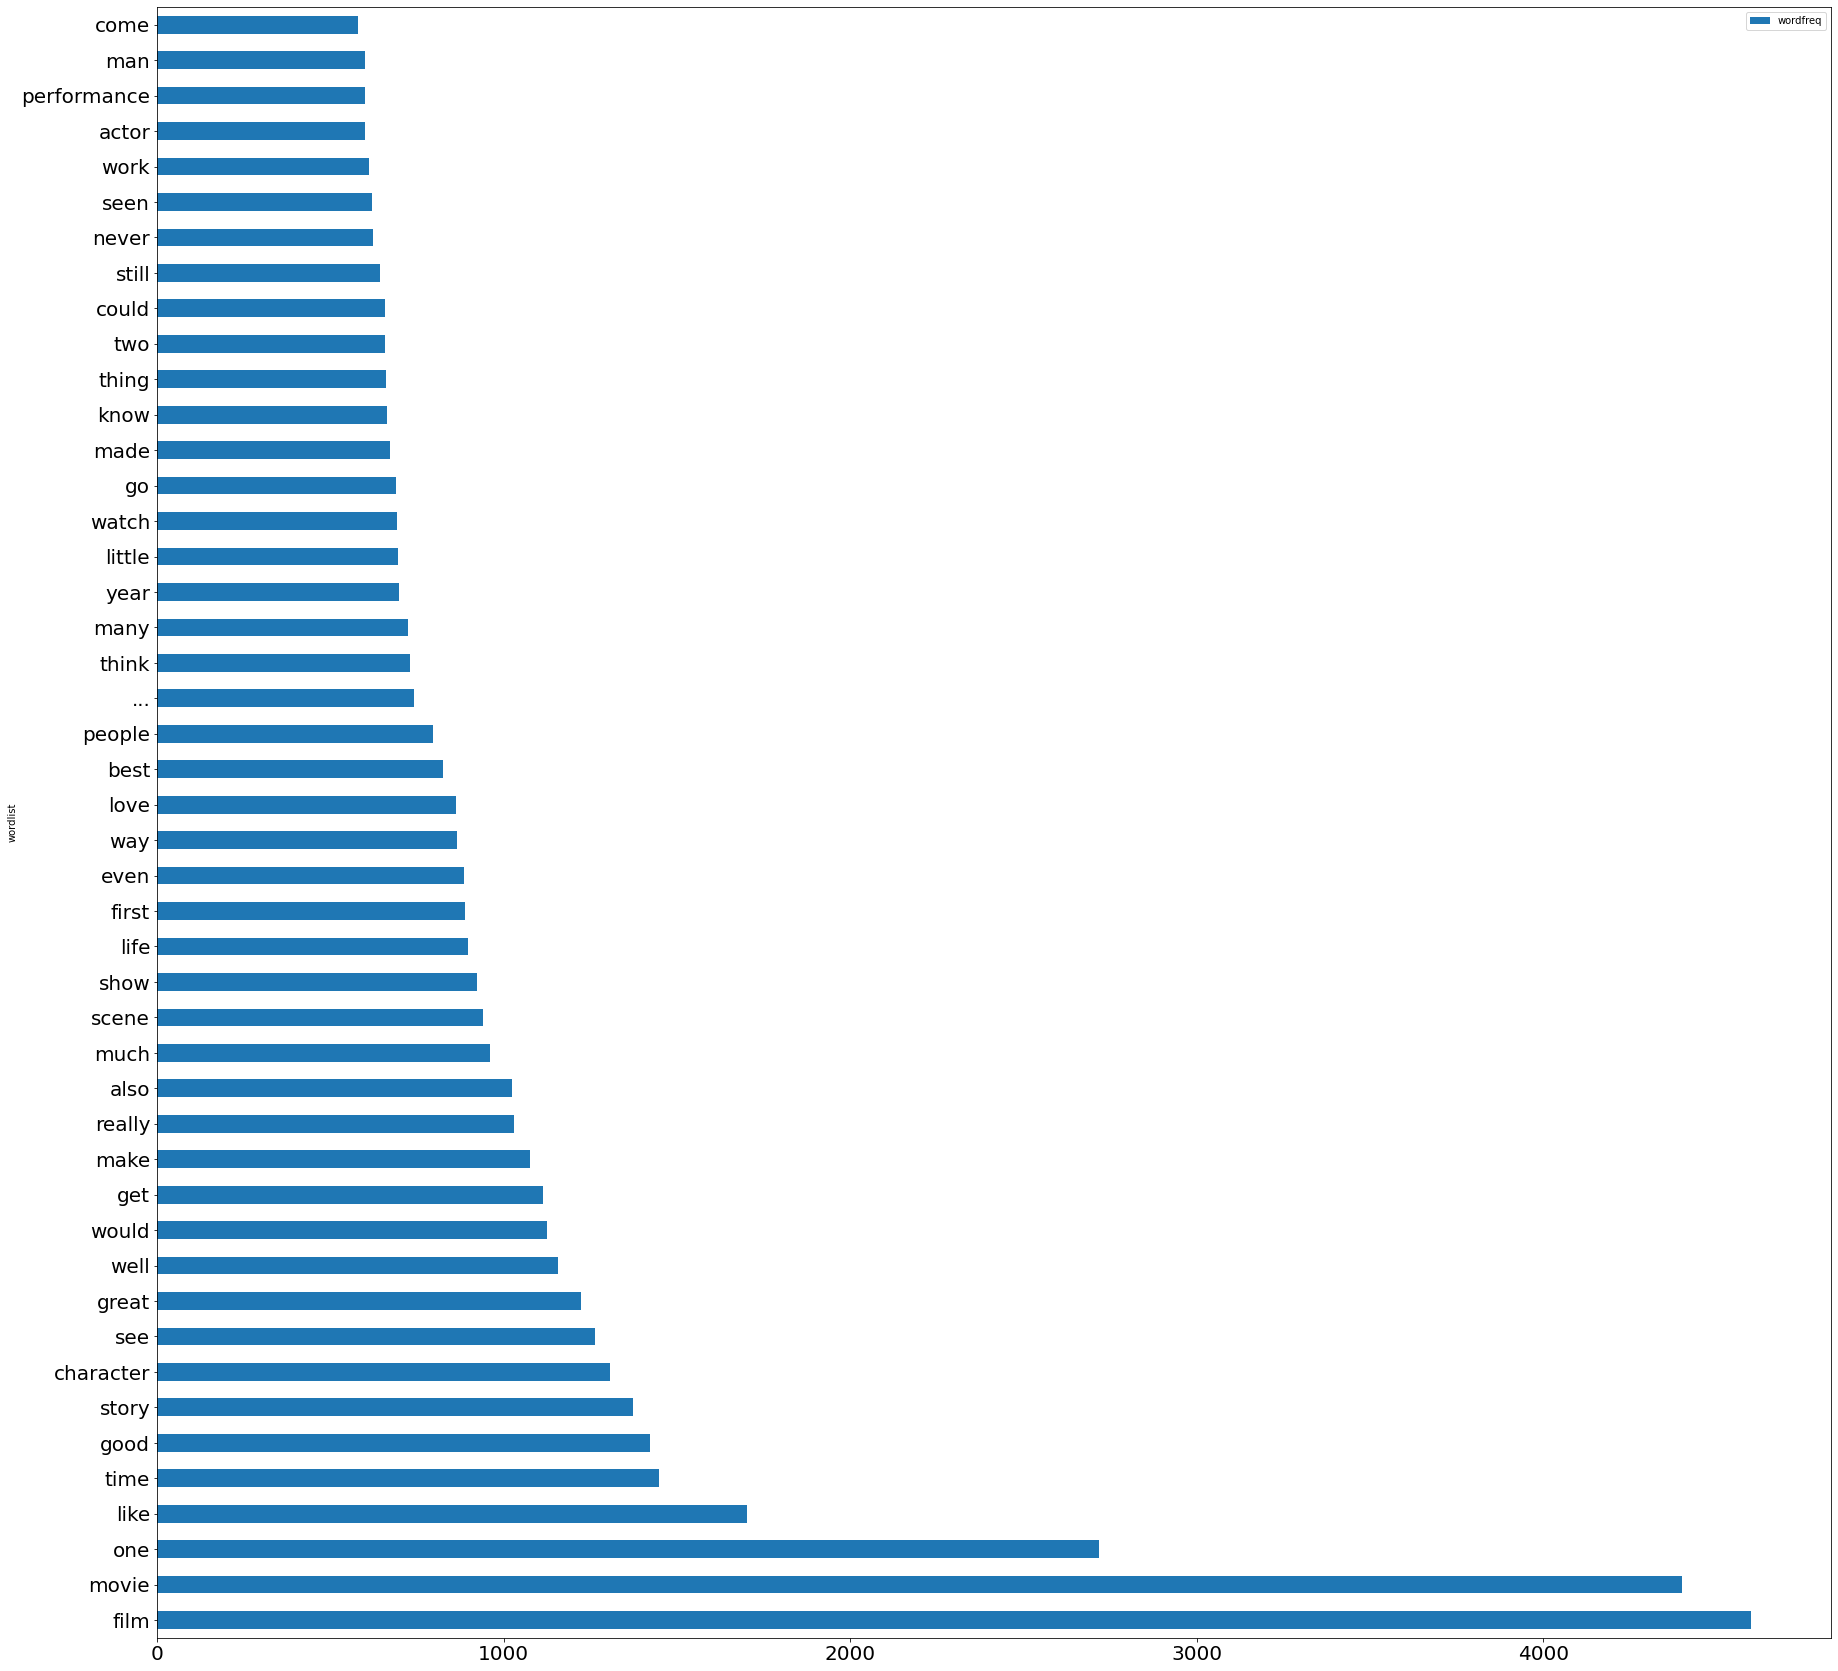

In [25]:
# Barchart
bar_df = df.loc[0:50, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

analysis fluff

##### Negative Reviews
fluff about next section on negative words

In [26]:
# Look only at the negative reviews
reviews = ""
for ind in range(5000):
    if imdb_df["sentiment"][ind] == "negative":
        reviews = reviews + " " + imdb_df["review"][ind]
stop_words = stopwords.words("english") + list(punctuation)
words = word_tokenize(reviews.lower())
completewords = [w for w in words if w not in stop_words]
completestemmed = [WordNetLemmatizer().lemmatize(w) for w in completewords]
freq = FreqDist(completestemmed)
wordlist = []
wordfreq = []
for i in sorted(freq, key=freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(freq[i])
df = pd.DataFrame({'wordlist':wordlist, 'wordfreq':wordfreq})
df

,wordlist,wordfreq
0,br,10836
1,'s,5831
2,movie,5726
3,film,4334
4,n't,4076
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


In [27]:
# Clean up dataframe and drop weird words
df = df.drop(labels=0)
df = df.drop(labels=1)
df = df.drop(labels=4)
df = df.drop(labels=5)
df = df.drop(labels=6)
df

,wordlist,wordfreq
2,movie,5726
3,film,4334
7,one,2584
8,like,2291
9,even,1606
...,...,...
29968,extracted,1
29969,brutalizing,1
29970,unscarred,1
29971,mastroianni-movie,1


what do these words tell us?

<AxesSubplot:ylabel='wordlist'>

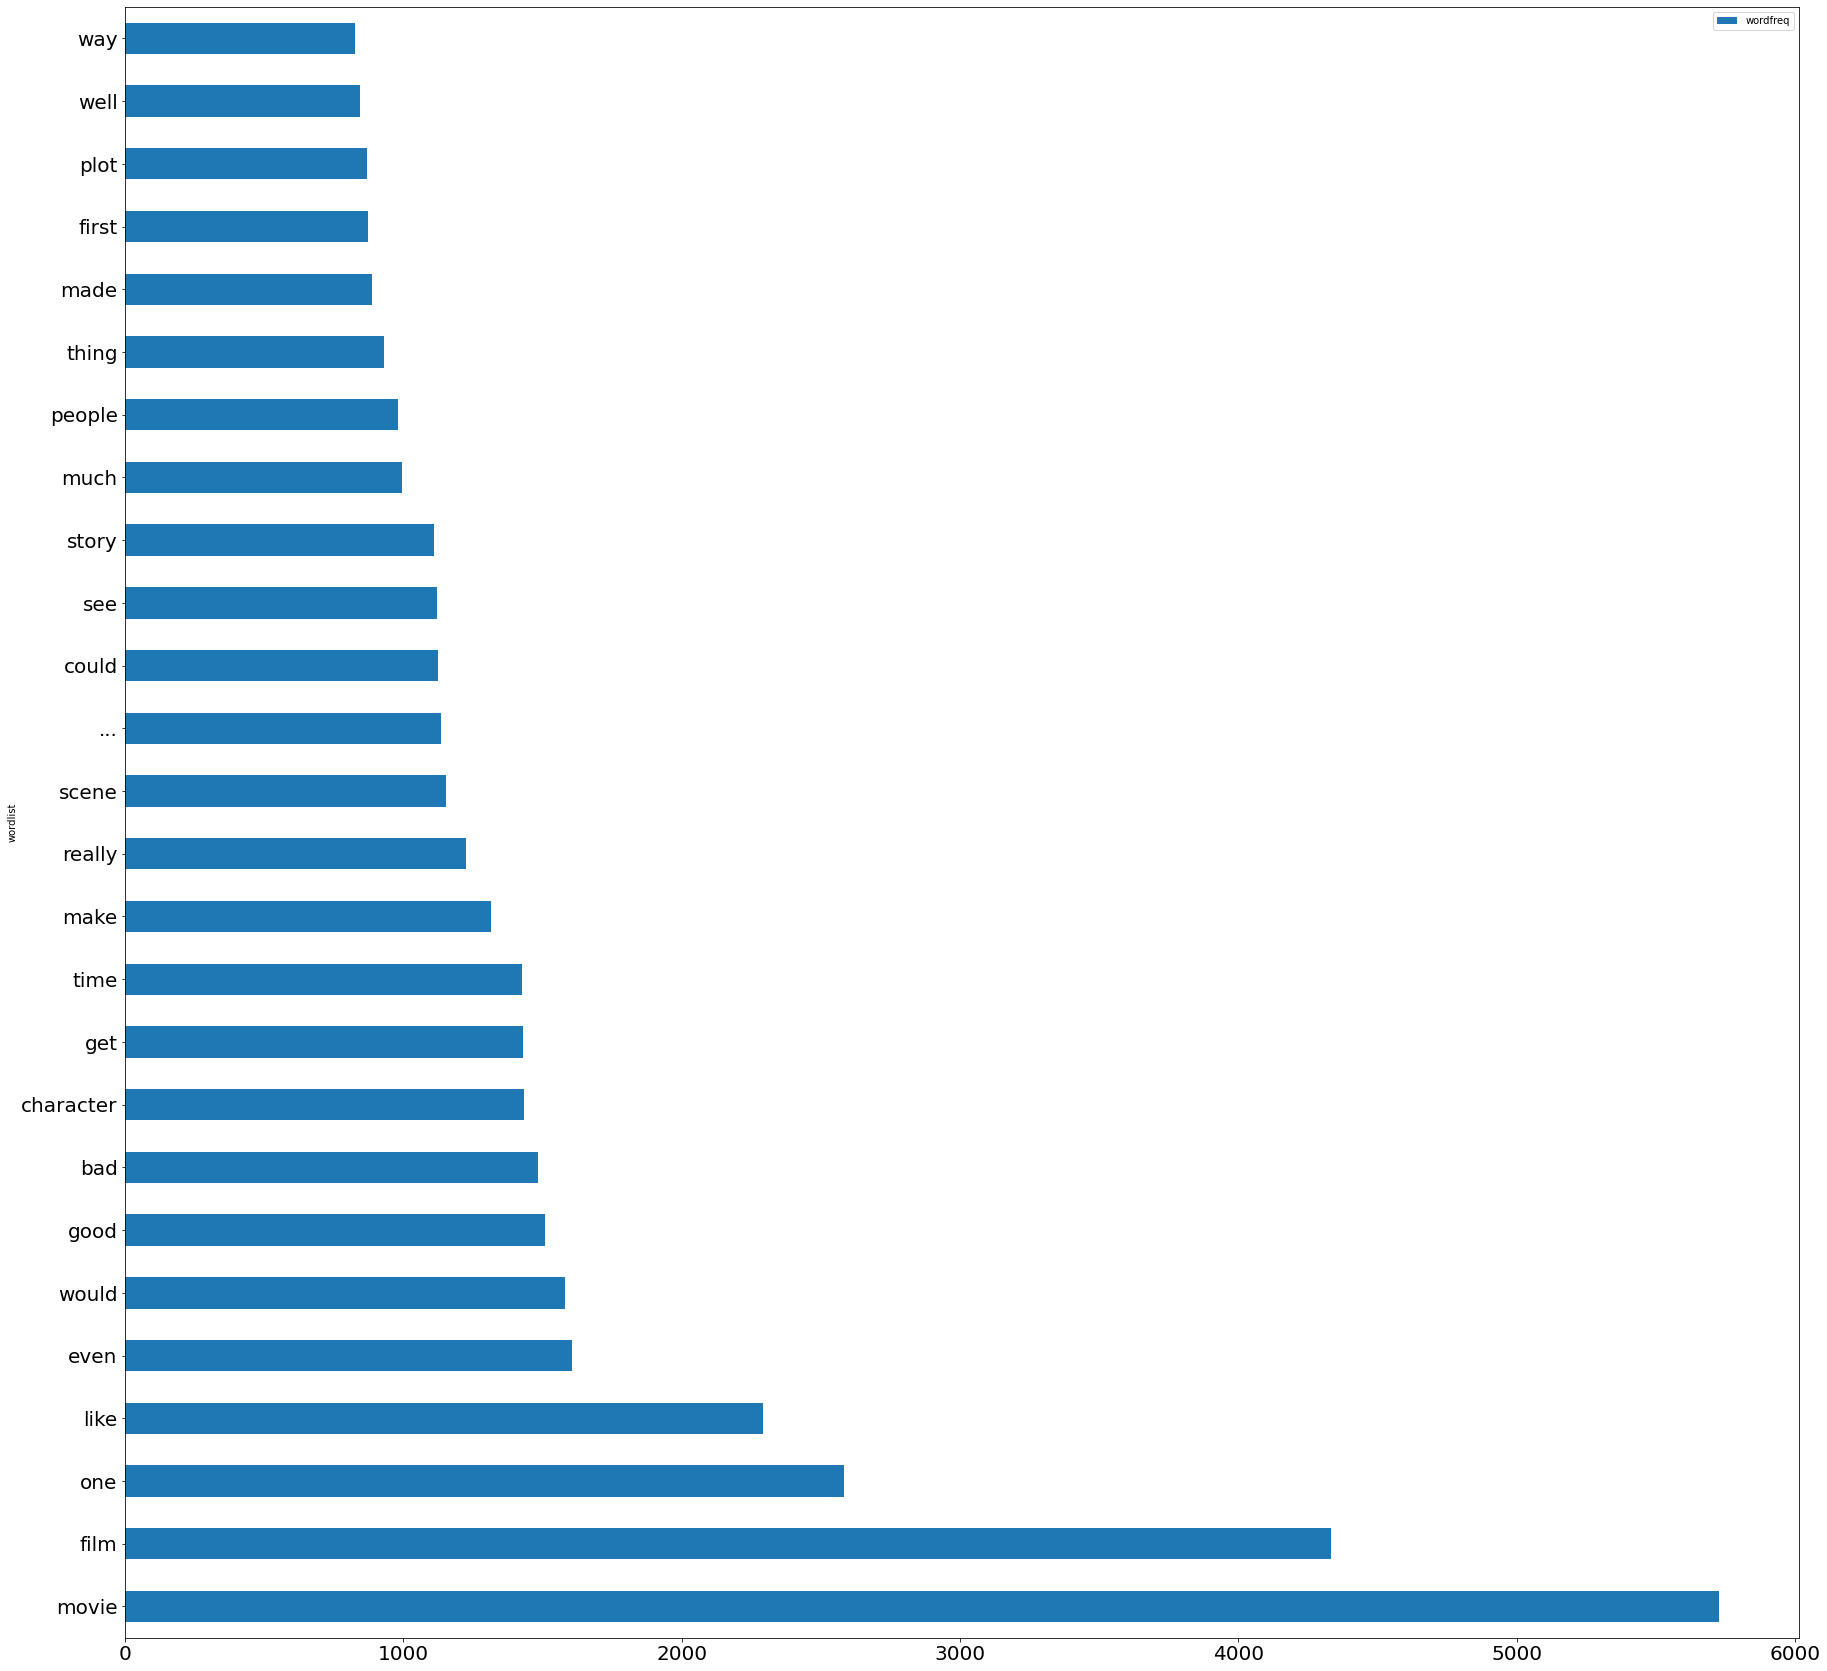

In [28]:
# Barchart
bar_df = df.loc[0:30, ["wordlist", "wordfreq"]]
bar_df.plot.barh(x="wordlist", y="wordfreq", figsize=(30,30), fontsize=20)

analysis fluff

We can see that in the reviews with negative sentiment, they are using very succinct words such as good or bad. This is probably due to the fact that the reviewer didn't like the movie so they don't want to waste time writing an indepth review about the movie. However, you look at the most frequent words for reviews with positive sentiment and you can see similar succint words. It turns out succinct words are just positive in general but the positive sentiment reviews includes more synonomous with good such as great or love.

#### Data Analysis

fluff stuffs

In [29]:
sia = vader.SentimentIntensityAnalyzer()

In [31]:
#for loop for the whole dataset

#k = 0
#for index, row in imdb_df.iterrows():
    #review = imdb_df["review"].iloc[k]
    #print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
    #k+=1
    
#idk might want to modify this so the output is not gigantic

In [32]:
k = 0
data = []
for index, row in imdb_df.iterrows():
    while k < 50:
        review = imdb_df["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        data.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is -0.9213
Review 4's compound polarity score is 0.9744
Review 5's compound polarity score is 0.9828
Review 6's compound polarity score is 0.9022
Review 7's compound polarity score is 0.8596
Review 8's compound polarity score is 0.2362
Review 9's compound polarity score is 0.9149
Review 10's compound polarity score is 0.9482
Review 11's compound polarity score is 0.5223
Review 12's compound polarity score is -0.9721
Review 13's compound polarity score is 0.3425
Review 14's compound polarity score is 0.6168
Review 15's compound polarity score is -0.6993
Review 16's compound polarity score is 0.3506
Review 17's compound polarity score is -0.9868
Review 18's compound polarity score is 0.6518
Review 19's compound polarity score is 0.945
Review 20's compound polarity score is 0.5425
Review 21's compound polarity score is -

In [35]:
# put compound polarity scores in a dataframe
data_df = pd.DataFrame(data)
data_df

,0
0,-0.9951
1,0.9641
2,0.9605
3,-0.9213
4,0.9744
5,0.9828
6,0.9022
7,0.8596
8,0.2362
9,0.9149


<AxesSubplot:>

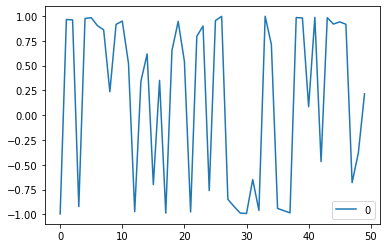

In [36]:
#line graph of the compound polarity scores
data_df.plot(kind='line')

analysis fluff

next section on positive scores

In [37]:
#looking at only polarity scores labeled as "positive"
grouped = imdb_df.groupby(imdb_df.sentiment)

positive = grouped.get_group("positive")
positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [39]:
k = 0
posdata = []
for index, row in positive.iterrows():
    while k < 50:
        review = positive["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        posdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9951
Review 1's compound polarity score is 0.9641
Review 2's compound polarity score is 0.9605
Review 3's compound polarity score is 0.9744
Review 4's compound polarity score is 0.9828
Review 5's compound polarity score is 0.9022
Review 6's compound polarity score is 0.9149
Review 7's compound polarity score is 0.6168
Review 8's compound polarity score is 0.3506
Review 9's compound polarity score is 0.6518
Review 10's compound polarity score is 0.5425
Review 11's compound polarity score is 0.7948
Review 12's compound polarity score is 0.954
Review 13's compound polarity score is 0.9962
Review 14's compound polarity score is -0.987
Review 15's compound polarity score is -0.9907
Review 16's compound polarity score is -0.6485
Review 17's compound polarity score is 0.9971
Review 18's compound polarity score is 0.9838
Review 19's compound polarity score is 0.9858
Review 20's compound polarity score is 0.9182
Review 21's compound polarity score is 0.9

<AxesSubplot:>

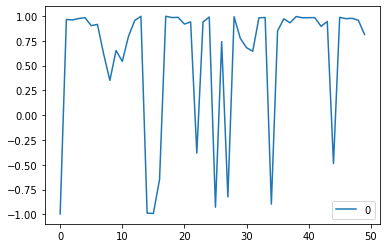

In [40]:
posdata_df = pd.DataFrame(posdata)
posdata_df.plot(kind='line')

analysis fluff

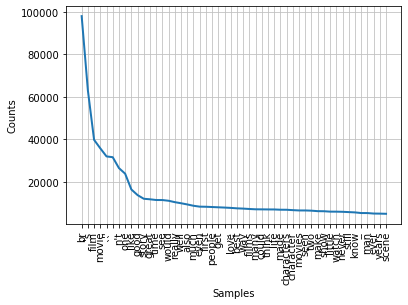

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [52]:
positiveFreq.plot(50,cumulative=False)

fluff

stuff about negative section

In [43]:
grouped = imdb_df.groupby(imdb_df.sentiment)

negative = grouped.get_group("negative")
negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [44]:
k = 0
negdata = []
for index, row in negative.iterrows():
    while k < 50:
        review = negative["review"].iloc[k]
        print('Review ' + str(k) + "'s compound polarity score is " + str(sia.polarity_scores(review)["compound"]))
        negdata.append(sia.polarity_scores(review)["compound"])
        k+=1

Review 0's compound polarity score is -0.9213
Review 1's compound polarity score is 0.8596
Review 2's compound polarity score is 0.2362
Review 3's compound polarity score is 0.9482
Review 4's compound polarity score is 0.5223
Review 5's compound polarity score is -0.9721
Review 6's compound polarity score is 0.3425
Review 7's compound polarity score is -0.6993
Review 8's compound polarity score is -0.9868
Review 9's compound polarity score is 0.945
Review 10's compound polarity score is -0.9755
Review 11's compound polarity score is 0.899
Review 12's compound polarity score is -0.7602
Review 13's compound polarity score is -0.8481
Review 14's compound polarity score is -0.9208
Review 15's compound polarity score is -0.9604
Review 16's compound polarity score is 0.7133
Review 17's compound polarity score is -0.9399
Review 18's compound polarity score is -0.962
Review 19's compound polarity score is -0.9847
Review 20's compound polarity score is 0.9797
Review 21's compound polarity score

<AxesSubplot:>

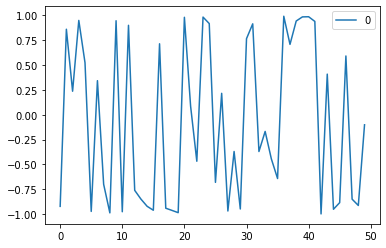

In [45]:
negdata_df = pd.DataFrame(negdata)
negdata_df.plot(kind='line')

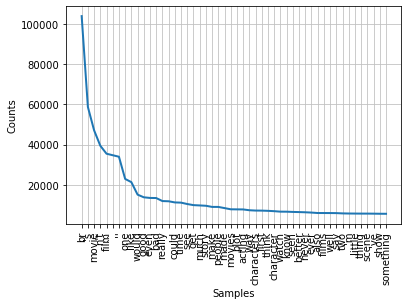

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
negfreq.plot(50,cumulative=False)

In [46]:
posdata_df.mean()

0    0.58517
dtype: float64

In [47]:
negdata_df.mean()

0   -0.076252
dtype: float64

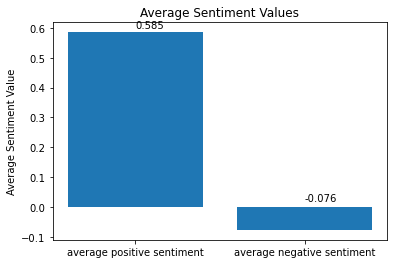

In [48]:
n=1
r = np.arange(n)
width = 0.25

x = [posdata_df.mean()[0], negdata_df.mean()[0]]

ax1 = plt.subplot()
ax1.set_xticks([1,2])

# plt.bar(r, posdata_df.mean(), color = 'b',
#         width = width, edgecolor = 'black',
#         label='average positive sentiment')
# plt.bar(r + width, negdata_df.mean(), color = 'r',
#         width = width, edgecolor = 'black',
#         label='average negative sentiment')
plt.bar([1,2], x)

ax1.set_xticklabels(['average positive sentiment', 'average negative sentiment'])
plt.ylabel("Average Sentiment Value")
  
plt.title("Average Sentiment Values")  
plt.text(1, 0.6, str(round(x[0], 3)))
plt.text(2, 0.02, str(round(x[1], 3)))
  
plt.show()

words here

### Discussion 
(what does your analysis show, what is the big picture, and how are these findings useful?)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Duis vitae augue justo. In vitae ligula eleifend, accumsan sapien ut, cursus odio. Nunc id tincidunt turpis. Nulla faucibus massa ut ipsum ultricies pulvinar at sodales turpis. Nunc vitae porttitor orci. Praesent a mauris vel felis accumsan euismod ultrices nec risus. Vivamus ligula sapien, blandit in nunc eu, tincidunt posuere quam. Aenean quis venenatis lorem, non tempor purus. Sed sapien velit, scelerisque quis accumsan non, volutpat id odio. In sollicitudin diam a felis volutpat varius. Quisque fermentum augue nisi, sit amet porttitor augue mollis id. Phasellus dictum magna ac tellus molestie, ac dictum dui dapibus.

### Team Member Contributions
If you are working in a group, the end must describe each group member's contribution to
this final project (one sentence each).

#### Crystal Huynh
filler text

#### Larry Qu
filler text

#### Nelson Truong
filler text